In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("airbnb_cartagena.sqlite")
df_attributes = pd.read_sql_query("SELECT * FROM Attributes", conn)
df_time_series = pd.read_sql_query("SELECT * FROM TimeSeriesInterpolated", conn)
conn.close()
print(df_attributes.columns)
df_attributes.head()


Index(['Name', 'Host', 'Base fee', 'Cleaning fee', 'URL', 'ID', 'latitude',
       'longitude', 'Property type', 'Person capacity', 'accuracy_rating',
       'checking_rating', 'cleanliness_rating', 'communication_rating',
       'location_rating', 'value_rating', 'satisfaction_rating', 'Reviews',
       'Bedrooms', 'Beds', 'Baths', 'City skyline view', 'Beach view',
       'Sea/Lake view', 'Hot water', 'Jacuzzi', 'Shared pool', 'Shared gym',
       'Patio or balcony', 'Outdoor furniture', 'Outdoor playground',
       'Elevator', 'Carport', 'Dedicated workspace', 'AC', 'Heating', 'TV',
       'Cable TV', 'Wifi', 'Laundry service', 'Kitchen', 'Dining table',
       'Microwave', 'Dishes and silverware', 'Refrigerator', 'Stove',
       'Coffee maker', 'Washer', 'Dryer', 'Sun loungers', 'Pets allowed',
       'Babysitter recommendations', 'Crib', 'Room-darkening shades',
       'Window guards', 'Security cameras', 'Lock on door', 'Keypad',
       'Fire extinguisher', 'First aid kit', 'Smok

,Name,Host,Base fee,Cleaning fee,URL,ID,latitude,longitude,Property type,Person capacity,...,Room-darkening shades,Window guards,Security cameras,Lock on door,Keypad,Fire extinguisher,First aid kit,Smoke detector,Luggage dropoff,Self check-in
0,14th Floor/Jacuzzi balcony/SeaViews/Parking/King,Alejandra,$95.00,$38.00,https://www.airbnb.ca/rooms/128289097755583918...,1282890977555839180,10.456400,-75.505410,Entire serviced apartment,5.0,...,1,0,1,0,0,1,1,1,1,1
1,2 BR Modern APT jacuzzi / Rooftop near to beach,Alberto,$100.00,$35.00,https://www.airbnb.com/rooms/12559080218421979...,1255908021842197930,10.456549,-75.505265,Entire rental unit,6.0,...,0,0,0,0,0,0,0,0,0,0
2,Piso 12/ Jacuzzi/ Vistas/ 1BR/Parqueadero/Pisc...,Alejandra,$67.00,$36.00,https://www.airbnb.mx/rooms/136437655186096193...,1364376551860961934,10.456523,-75.505361,Entire serviced apartment,4.0,...,1,0,1,0,0,0,1,1,1,1
3,Piso 14/ Jacuzzi/ Vistas/ 2BR/Parqueadero/Pisc...,Alejandra,$89.00,$36.00,https://www.airbnb.mx/rooms/127921819131081724...,1279218191310817247,10.456398,-75.505406,Entire serviced apartment,5.0,...,1,0,1,0,0,1,1,1,1,1
4,Luxury /Jacuzzi/ Decoration/ Caribbean/ Pools/,Alejandra,$81.00,$36.00,https://www.airbnb.mx/rooms/125978025681811266...,1259780256818112667,10.456398,-75.505406,Entire serviced apartment,4.0,...,1,0,1,0,0,1,1,1,1,1


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
columnas_fecha = []
for col in df_time_series.columns:
    try:
        datetime.strptime(col.strip(), "%d/%m/%Y")
        columnas_fecha.append(col)
    except ValueError:
        continue

# 3. Derretir (melt) el DataFrame para convertir columnas de fecha en filas
df_melted = df_time_series.melt(
    id_vars=["ID"],  # columnas fijas (puedes ajustar)
    value_vars=columnas_fecha,
    var_name="Date",
    value_name="Value"
)
df_melted["Date"] = pd.to_datetime(df_melted["Date"])

ids = df_time_series["ID"].unique()[:100]

fig = make_subplots(
    rows=10, cols=10,
    subplot_titles=[f"ID: {i}" for i in ids],
    horizontal_spacing=0.01,
    vertical_spacing=0.03
)

for idx, id_val in enumerate(ids):
    sub = df_melted[df_melted["ID"] == id_val].sort_values("Date")
    
    x = sub["Value"].iloc[:-1].values
    y = sub["Value"].iloc[1:].values
    
    row = idx // 10 + 1
    col = idx % 10 + 1
    
    trace = go.Scatter(
        x=x,
        y=y,
        mode="lines+markers", 
        marker=dict(size=4),
        line=dict(width=1),
        showlegend=False
    )
    
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=2000,
    width=2000,
    title_text="Value[t+1] vs Value[t] por ID",
    margin=dict(t=40),
)

fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=10) 

fig.show()



C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_24364\3413577712.py:20: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [21]:
df_attributes.columns

Index(['Name', 'Host', 'Base fee', 'Cleaning fee', 'URL', 'ID', 'latitude',
       'longitude', 'Property type', 'Person capacity', 'accuracy_rating',
       'checking_rating', 'cleanliness_rating', 'communication_rating',
       'location_rating', 'value_rating', 'satisfaction_rating', 'Reviews',
       'Bedrooms', 'Beds', 'Baths', 'City skyline view', 'Beach view',
       'Sea/Lake view', 'Hot water', 'Jacuzzi', 'Shared pool', 'Shared gym',
       'Patio or balcony', 'Outdoor furniture', 'Outdoor playground',
       'Elevator', 'Carport', 'Dedicated workspace', 'AC', 'Heating', 'TV',
       'Cable TV', 'Wifi', 'Laundry service', 'Kitchen', 'Dining table',
       'Microwave', 'Dishes and silverware', 'Refrigerator', 'Stove',
       'Coffee maker', 'Washer', 'Dryer', 'Sun loungers', 'Pets allowed',
       'Babysitter recommendations', 'Crib', 'Room-darkening shades',
       'Window guards', 'Security cameras', 'Lock on door', 'Keypad',
       'Fire extinguisher', 'First aid kit', 'Smok

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

df_numeric = df_attributes.select_dtypes(include=[np.number]).drop(columns=["ID"])
df_numeric = df_numeric.loc[:, df_numeric.nunique() > 2]  # elimina las binarias

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# PCA conservando 80% varianza
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(X_scaled)

print(f"Número de componentes seleccionados: {pca.n_components_}")
print(f"Varianza explicada total: {pca.explained_variance_ratio_.sum():.4f}")

Número de componentes seleccionados: 5
Varianza explicada total: 0.8326


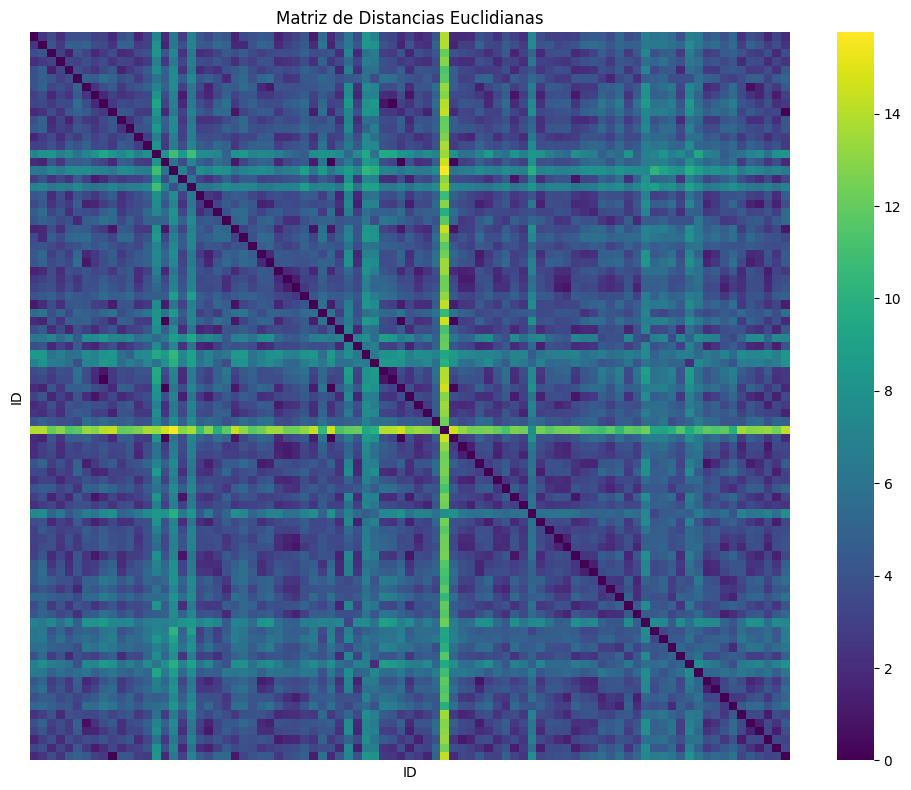

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy.spatial.distance import pdist, squareform
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# --- Filtrado de columnas numéricas relevantes ---
X = df_attributes.select_dtypes(include=[np.number]).drop(columns=["ID"])
X = X.loc[:, X.nunique() > 2]  # eliminar columnas binarias
X = VarianceThreshold(threshold=0.01).fit_transform(X)  # eliminar columnas de baja varianza

# --- Escalado y PCA ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.80)  # mantener 80% de varianza
X_pca = pca.fit_transform(X_scaled)

# --- DataFrame con resultados de PCA ---
columnas_pca = [f"PC{i+1}" for i in range(pca.n_components_)]
df_pca_result = pd.DataFrame(X_pca, columns=columnas_pca)
df_pca_result["ID"] = df_attributes["ID"].values

# --- Matriz de distancias ---
dist_matrix = squareform(pdist(X_scaled, metric='euclidean'))
df_dist = pd.DataFrame(dist_matrix, index=df_pca_result["ID"], columns=df_pca_result["ID"])

# --- Gráfico interactivo con Plotly ---
color_column = "PC3" if "PC3" in df_pca_result.columns else columnas_pca[1]

fig = px.scatter(
    df_pca_result,
    x="PC1",
    y="PC2",
    color=color_column,
    hover_name="ID",
    title="Proyección PCA (PC1 vs PC2)",
    width=800,
    height=600,
)

fig.update_traces(marker=dict(size=6, opacity=0.8), selector=dict(mode='markers'))
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    template="plotly_white",
    showlegend=False
)
fig.show()

# --- Heatmap de la matriz de distancias ---
plt.figure(figsize=(10, 8))
sns.heatmap(df_dist, cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Matriz de Distancias Euclidianas")
plt.tight_layout()
plt.show()


In [22]:
import os
import os
from scipy.spatial.distance import pdist, squareform
from PIL import Image
points = df_pca_result[["PC1", "PC2", "ID"]].copy().reset_index(drop=True)
X = points[["PC1", "PC2"]].values
ids = points["ID"].astype(str).values

# Configuración
n_frames = 30
max_radius = 0.5  # Ajusta según escala de PC
frames = []

# Crear carpeta temporal para imágenes
os.makedirs("frames_tmp", exist_ok=True)

for frame_idx in range(n_frames):
    radius = max_radius * (frame_idx + 1) / n_frames
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    # Dibujar círculos
    for i, (x, y) in enumerate(X):
        circle = plt.Circle((x, y), radius=radius, color='lightblue', alpha=0.3)
        ax.add_patch(circle)
        ax.text(x, y, ids[i], fontsize=8, ha='center', va='center')

    for i in range(len(X)):
        for j in range(i+1, len(X)):
            dist = np.linalg.norm(X[i] - X[j])
            if dist < 2 * radius:
                ax.plot([X[i][0], X[j][0]], [X[i][1], X[j][1]], 'b-', alpha=0.4)

    ax.set_title(f"Frame {frame_idx+1}")
    ax.axis('off')

    # Guardar imagen temporal
    filename = f"frames_tmp/frame_{frame_idx:03d}.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    frames.append(Image.open(filename))
frames.append(Image.open(filename))

frames[0].save("nerves_cartagena.gif", save_all=True, append_images=frames[1:], duration=100, loop=0)
